# Overfitting and underfitting

## Considering the example of the movie reviews 

We will start by changing the number of hidden unit per layer to the effect of that change in the validation loss.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

This was the model considered in the previous example.

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 256us/step - loss: 0.5224 - acc: 0.7747 - val_loss: 0.3954 - val_acc: 0.8606
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.3144 - acc: 0.9001 - val_loss: 0.3123 - val_acc: 0.8845
Epoch 3/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2310 - acc: 0.9256 - val_loss: 0.2998 - val_acc: 0.8806
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1818 - acc: 0.9427 - val_loss: 0.2782 - val_acc: 0.8879
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1480 - acc: 0.9547 - val_loss: 0.2772 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1211 - acc: 0.9633 - val_loss: 0.3102 - val_acc: 0.8788
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0985 - acc: 0.9723 - val_loss: 0.3036 - 

In [10]:
history_dict = history.history
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)

In [11]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.6050 - acc: 0.7685 - val_loss: 0.5338 - val_acc: 0.8324
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.4635 - acc: 0.8736 - val_loss: 0.4312 - val_acc: 0.8628
Epoch 3/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3712 - acc: 0.8937 - val_loss: 0.3685 - val_acc: 0.8749
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.3052 - acc: 0.9095 - val_loss: 0.3337 - val_acc: 0.8755
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2585 - acc: 0.9204 - val_loss: 0.3015 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2233 - acc: 0.9293 - val_loss: 0.2844 - val_acc: 0.8913
Epoch 7/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1961 - acc: 0.9375 - val_loss: 0.2792 - 

In [13]:
history_dict2 = history2.history
val_loss_values2 = history_dict2['val_loss']
epochs2 = range(1, 20 + 1)

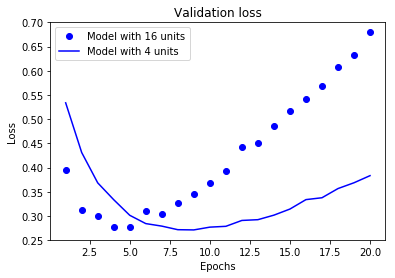

In [16]:
import matplotlib.pyplot as plt
plt.plot(epochs, val_loss_values, 'bo', label='Model with 16 units')
plt.plot(epochs2, val_loss_values2, 'b', label='Model with 4 units')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As you can see, the smaller network starts overfitting later than the reference network (after six epochs rather than four), and its performance degrades more slowly once it starts overfitting.

### Adding L2 weight regularization to the model

In [17]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 276us/step - loss: 0.5618 - acc: 0.7840 - val_loss: 0.4359 - val_acc: 0.8673
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.3664 - acc: 0.8937 - val_loss: 0.3663 - val_acc: 0.8796
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2943 - acc: 0.9190 - val_loss: 0.3329 - val_acc: 0.8903
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2564 - acc: 0.9307 - val_loss: 0.3430 - val_acc: 0.8804
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2298 - acc: 0.9404 - val_loss: 0.3284 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2142 - acc: 0.9468 - val_loss: 0.3347 - val_acc: 0.8852
Epoch 7/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2074 - acc: 0.9481 - val_loss: 0.3419 - 

In [19]:
history_dict3 = history3.history
val_loss_values3 = history_dict3['val_loss']
epochs2 = range(1, 20 + 1)

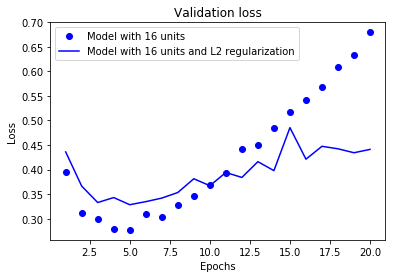

In [20]:
import matplotlib.pyplot as plt
plt.plot(epochs, val_loss_values, 'bo', label='Model with 16 units')
plt.plot(epochs2, val_loss_values3, 'b', label='Model with 16 units and L2 regularization')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters.